# 🔵🔴 Creating Football Data Visualizations with Python
## Barcelona La Liga 2025-26 — A Complete Tutorial

---

**Created by:** [HackrLife](https://twitter.com/hackrlife)  
**Newsletter:** [Barça Futbol](https://barcafutbol.substack.com)  
**Data Source:** FBref.com

---

### What You'll Learn

In this tutorial, you'll build **20 professional football visualizations** from scratch:

| Type | Visualizations |
|------|----------------|
| Pie Charts | Team xAG distribution |
| Bar Charts | xAG/90, Assists/90, Creative Output, Head-to-Head |
| Grouped Bars | Progressive Actions comparison |
| Radar Charts | Player profiles (Lamine, Pedri, Raphinha, Rashford, Fermín) |
| Pizza Charts | Percentile rankings for each player |
| Scatter Plots | Creator vs Finisher, Expected vs Actual, Progression Style, Volume vs Efficiency |

### Prerequisites

- Basic Python knowledge (variables, functions, loops)
- No prior data visualization experience needed

### How to Use This Notebook

1. Run each cell in order (Shift + Enter)
2. Read the explanations before each code block
3. Experiment by changing values
4. All visualizations will render inline

Let's get started! ⚽

---
## Section 1: Setup — Installing Libraries

We need three main libraries:

| Library | Purpose |
|---------|--------|
| `pandas` | Data loading and manipulation |
| `matplotlib` | Creating visualizations |
| `numpy` | Mathematical operations |

These come pre-installed in Google Colab, but we'll import them explicitly.

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from math import pi
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")

✅ Libraries imported successfully!
Pandas version: 2.0.0


---
## Section 2: Setting Up the Blaugrana Color Palette

A consistent color scheme makes your visualizations look professional. We'll use Barcelona's iconic colors:

| Color | Hex Code | Usage |
|-------|----------|-------|
| Navy Blue | #004D98 | Primary color |
| Deep Red | #A50044 | Secondary color |
| Gold | #EDBB00 | Accent/highlight |
| Dark Background | #1a1a2e | Chart background |
| Light | #F5F5F5 | Text and accents |

In [2]:
# Define Blaugrana color palette
BARCA_BLUE = '#004D98'    # Navy blue
BARCA_RED = '#A50044'     # Deep red  
BARCA_GOLD = '#EDBB00'    # Gold accent
BARCA_LIGHT = '#F5F5F5'   # Light gray
BARCA_DARK = '#1a1a2e'    # Dark background
FERMIN_GREEN = '#00C853'  # Green for Fermín

# Extended palette for multiple players
PLAYER_COLORS = {
    'Lamine Yamal': BARCA_BLUE,
    'Pedri': BARCA_RED,
    'Raphinha': BARCA_GOLD,
    'Marcus Rashford': '#5D8AA8',
    'Fermín López': FERMIN_GREEN,
    'Fermin López': FERMIN_GREEN,  # Handle accent variation
}

print("✅ Color palette defined!")
print(f"Primary Blue: {BARCA_BLUE}")
print(f"Primary Red: {BARCA_RED}")

✅ Color palette defined!
Primary Blue: #004D98
Primary Red: #A50044


---
## Section 3: Global Matplotlib Styling

We'll set global style parameters so all our charts have a consistent dark theme look.

In [3]:
# Set global matplotlib style parameters
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.facecolor'] = BARCA_DARK
plt.rcParams['axes.facecolor'] = BARCA_DARK
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

print("✅ Global styling applied!")

✅ Global styling applied!


---
## Section 4: Loading the Data

### Option A: Upload the CSV file
If you have the `Barca_La_Liga_2025-26.csv` file, upload it to Colab:
1. Click the folder icon on the left sidebar
2. Click the upload button
3. Select your CSV file

### Option B: Use the embedded data
We'll create the data directly in this notebook so it works without any file upload.

In [4]:
# Create the Barcelona La Liga 2025-26 data directly
# This is the same data from FBref

from io import StringIO

data_string = """Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Gls90,Ast90,G+A90,G-PK90,G+A-PK90,xG90,xAG90,xG+xAG90,npxG90,npxG+xAG90
Eric García,es ESP,"DF,MF",25,19,17,1468,16.3,1,0,1,1,0,0,1,0,2.4,2.4,1.3,3.7,16,111,30,0.06,0,0.06,0.06,0.06,0.15,0.08,0.23,0.15,0.23
Pau Cubarsí,es ESP,DF,18,15,15,1297,14.4,0,0,0,0,0,0,1,0,0.3,0.3,0.4,0.7,17,77,1,0,0,0,0,0,0.02,0.03,0.05,0.02,0.05
Jules Koundé,fr FRA,DF,27,18,14,1331,14.8,1,1,2,1,0,0,3,0,0.7,0.7,1.1,1.8,23,70,65,0.07,0.07,0.14,0.07,0.14,0.04,0.07,0.12,0.04,0.12
Lamine Yamal,es ESP,FW,18,15,14,1259,14.0,7,7,14,5,2,2,0,0,5.1,3.5,5.4,8.9,107,78,153,0.5,0.5,1.0,0.36,0.86,0.36,0.39,0.75,0.25,0.64
Ferrán Torres,es ESP,FW,25,18,14,1144,12.7,11,1,12,11,0,0,2,0,8.7,8.7,1.4,10.1,8,17,74,0.87,0.08,0.94,0.87,0.94,0.68,0.11,0.79,0.68,0.79
Alejandro Balde,es ESP,DF,22,15,14,1123,12.5,0,2,2,0,0,0,2,0,0.2,0.2,1.2,1.5,33,62,92,0,0.16,0.16,0,0.16,0.02,0.1,0.12,0.02,0.12
Joan García,es ESP,GK,24,13,13,1170,13.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Pedri,es ESP,MF,23,15,13,1124,12.5,2,5,7,2,0,0,2,1,1.2,1.2,3.2,4.4,54,140,56,0.16,0.4,0.56,0.16,0.56,0.1,0.26,0.35,0.1,0.35
Marcus Rashford,eng ENG,FW,28,18,12,1110,12.3,2,6,8,2,0,0,2,0,4.0,4.0,3.2,7.2,52,38,161,0.16,0.49,0.65,0.16,0.65,0.32,0.26,0.59,0.32,0.59
Gerard Martín,es ESP,DF,24,17,12,975,10.8,0,0,0,0,0,0,3,0,0,0,0.5,0.5,15,75,38,0,0,0,0,0,0,0.05,0.05,0,0.05
Frenkie de Jong,nl NED,MF,28,14,11,1045,11.6,0,3,3,0,0,0,3,1,0.5,0.5,2.0,2.6,35,115,21,0,0.26,0.26,0,0.26,0.05,0.17,0.22,0.05,0.22
Raphinha,br BRA,"FW,MF",29,12,10,763,8.5,7,3,10,6,1,1,2,0,5.5,4.7,2.6,7.3,34,31,93,0.83,0.35,1.18,0.71,1.06,0.65,0.30,0.96,0.56,0.86
Dani Olmo,es ESP,MF,27,14,8,861,9.6,5,2,7,5,0,0,0,0,3.4,3.4,2.3,5.8,19,55,61,0.52,0.21,0.73,0.52,0.73,0.36,0.24,0.6,0.36,0.6
Robert Lewandowski,pl POL,FW,37,14,7,698,7.8,9,1,10,8,1,3,1,0,7.8,5.5,0.9,6.3,6,9,44,1.16,0.13,1.29,1.03,1.16,1.01,0.11,1.12,0.7,0.82
Fermin López,es ESP,"MF,FW",22,13,7,694,7.7,4,4,8,4,0,0,1,0,2.4,2.4,3.2,5.7,21,34,55,0.52,0.52,1.04,0.52,1.04,0.32,0.42,0.74,0.32,0.74
Ronald Araújo,uy URU,DF,26,11,7,649,7.2,2,0,2,2,0,0,2,0,0.4,0.4,0,0.4,11,29,4,0.28,0,0.28,0.28,0.28,0.05,0,0.06,0.05,0.06
Marc Casado,es ESP,MF,22,13,6,549,6.1,0,1,1,0,0,0,0,0,0.3,0.3,0.2,0.5,7,27,9,0,0.16,0.16,0,0.16,0.05,0.03,0.08,0.05,0.08
Wojciech Szczęsny,pl POL,GK,35,6,6,540,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Andreas Christensen,dk DEN,DF,29,12,3,380,4.2,0,0,0,0,0,0,1,0,0.1,0.1,0,0.1,3,16,0,0,0,0,0,0,0.02,0,0.02,0.02,0.02
Roony Bardghji,se SWE,FW,20,9,3,247,2.7,1,1,2,1,0,0,0,0,1.0,1.0,1.0,2.0,13,13,37,0.36,0.36,0.73,0.36,0.73,0.37,0.35,0.71,0.37,0.71
Marc Bernal,es ESP,MF,18,7,1,127,1.4,0,1,1,0,0,0,1,0,0,0,0.6,0.6,1,7,3,0,0.71,0.71,0,0.71,0.01,0.41,0.43,0.01,0.43
"""

# Load data from string
df = pd.read_csv(StringIO(data_string))

print("✅ Data loaded successfully!")
print(f"Total players: {len(df)}")
print(f"Columns: {len(df.columns)}")

✅ Data loaded successfully!
Total players: 21
Columns: 33


---
## Section 5: Data Cleaning & Preparation

FBref data often needs cleaning:
1. Convert string numbers to actual numbers
2. Filter out players with too few minutes
3. Calculate additional per-90 metrics

In [5]:
# Ensure numeric columns are properly typed
numeric_cols = ['90s', 'Gls', 'Ast', 'G+A', 'xG', 'xAG', 'PrgC', 'PrgP', 'PrgR',
                'Gls90', 'Ast90', 'G+A90', 'xAG90']

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Filter to players with at least 2.0 90s played (meaningful sample)
df_filtered = df[df['90s'] >= 2.0].copy()

# Calculate additional per-90 metrics
df_filtered['PrgP90'] = df_filtered['PrgP'] / df_filtered['90s']
df_filtered['PrgC90'] = df_filtered['PrgC'] / df_filtered['90s']
df_filtered['PrgR90'] = df_filtered['PrgR'] / df_filtered['90s']

print("✅ Data cleaned!")
print(f"Players with 2+ 90s: {len(df_filtered)}")
print("\nTop 5 by xAG:")
print(df_filtered.nlargest(5, 'xAG')[['Player', 'xAG', '90s']])

✅ Data cleaned!
Players with 2+ 90s: 20

Top 5 by xAG:
             Player  xAG   90s
3      Lamine Yamal  5.4  14.0
7             Pedri  3.2  12.5
8   Marcus Rashford  3.2  12.3
14     Fermin López  3.2   7.7
11         Raphinha  2.6   8.5


---
## Section 6: Helper Functions

We'll create reusable functions for:
- Getting player colors
- Determining dot sizes for scatter plots

In [6]:
# Define top 5 creators for highlighting
TOP5_CREATORS = ['Lamine Yamal', 'Pedri', 'Raphinha', 'Marcus Rashford', 'Fermin López']

def get_player_color(player_name):
    """
    Returns the designated color for a player.
    Top 5 creators get unique colors; others get gray.
    """
    color_map = {
        'Lamine Yamal': BARCA_BLUE,
        'Pedri': BARCA_RED,
        'Raphinha': BARCA_GOLD,
        'Marcus Rashford': '#5D8AA8',
        'Fermin López': FERMIN_GREEN,
    }
    return color_map.get(player_name, '#888888')

def get_marker_size(player_name):
    """
    Returns marker size — larger for top 5 creators.
    """
    return 200 if player_name in TOP5_CREATORS else 80

print("✅ Helper functions defined!")

✅ Helper functions defined!


---
# 📊 VISUALIZATION 1: Team xAG Distribution (Pie Chart)

**Purpose:** Show which players are responsible for Barcelona's chance creation.

**Key Concepts:**
- `plt.pie()` creates pie charts
- `autopct` adds percentage labels
- `startangle` rotates the chart

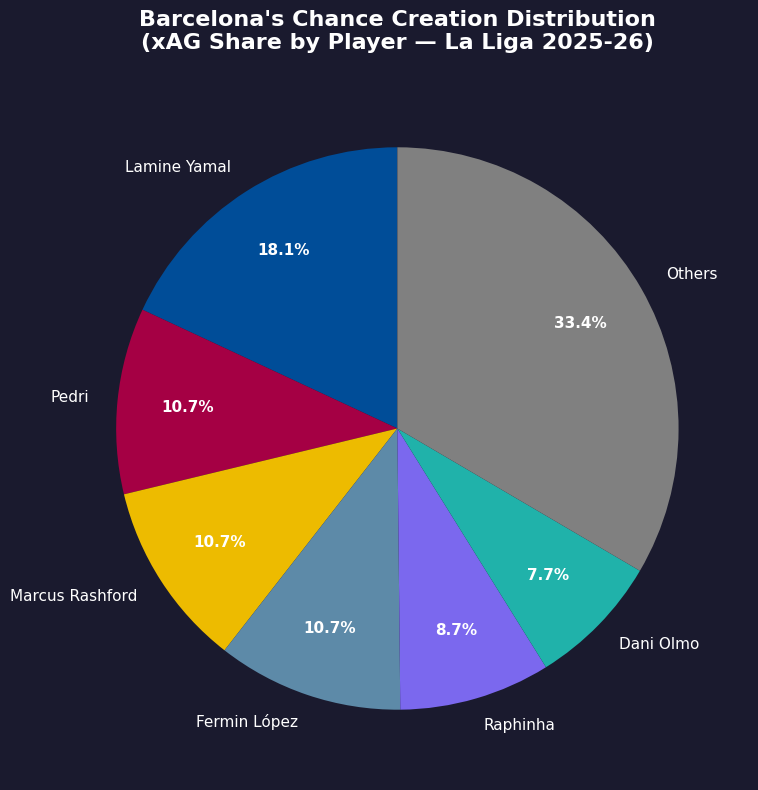


📊 Visualization 1 complete!


In [7]:
# VISUALIZATION 1: Team xAG Distribution — Pie Chart

# Create figure
fig, ax = plt.subplots(figsize=(10, 8))
fig.patch.set_facecolor(BARCA_DARK)

# Get top 6 players by xAG, group rest as "Others"
top6 = df_filtered.nlargest(6, 'xAG')[['Player', 'xAG']].copy()
others_xag = df_filtered['xAG'].sum() - top6['xAG'].sum()

# Prepare data for pie chart
pie_data = list(top6['xAG']) + [others_xag]
pie_labels = list(top6['Player']) + ['Others']

# Define colors for each slice
colors_pie = [BARCA_BLUE, BARCA_RED, BARCA_GOLD, '#5D8AA8', '#7B68EE', '#20B2AA', '#808080']

# Create pie chart
wedges, texts, autotexts = ax.pie(
    pie_data, 
    labels=pie_labels, 
    autopct='%1.1f%%',           # Show percentages with 1 decimal
    colors=colors_pie, 
    startangle=90,               # Start from top
    textprops={'color': 'white', 'fontsize': 11},
    pctdistance=0.75             # Position of percentage labels
)

# Style the percentage labels
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# Add title
ax.set_title("Barcelona's Chance Creation Distribution\n(xAG Share by Player — La Liga 2025-26)", 
             fontsize=16, fontweight='bold', color='white', pad=20)

plt.tight_layout()
plt.show()

print("\n📊 Visualization 1 complete!")

---
# 📊 VISUALIZATION 2: Creative Output (Stacked Bar Chart)

**Purpose:** Compare expected (xAG) vs actual assists for each player.

**Key Concepts:**
- `ax.barh()` creates horizontal bars
- `left` parameter creates stacked bars
- Sorting data before plotting

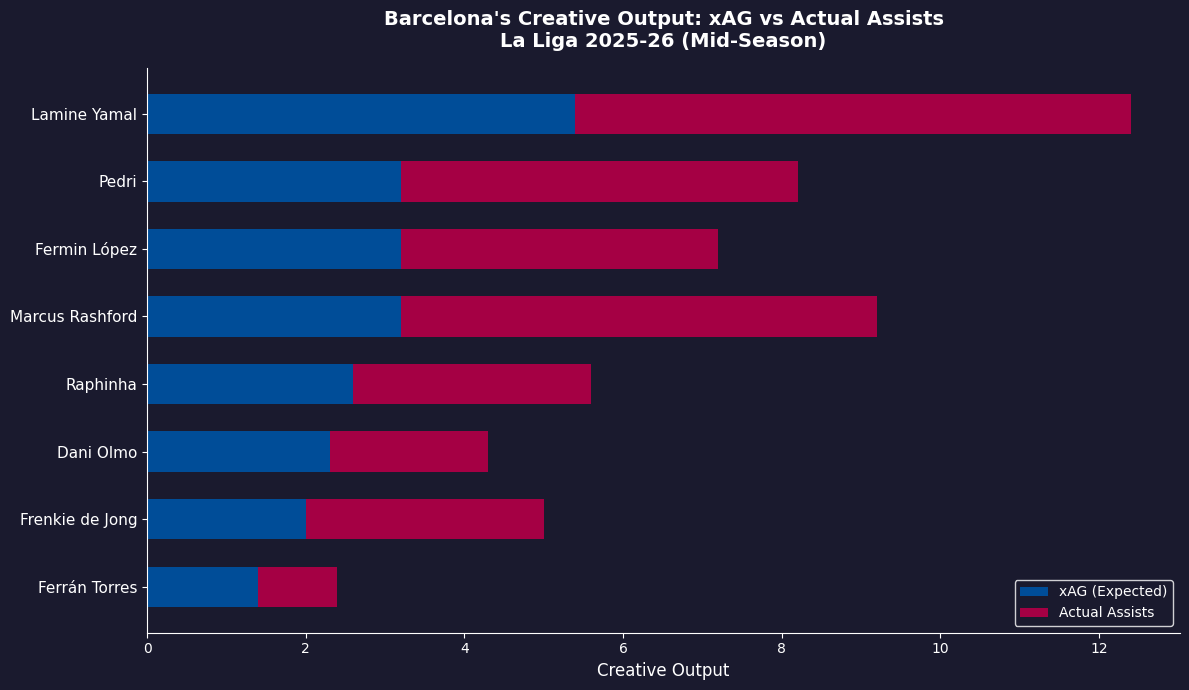


📊 Visualization 2 complete!


In [8]:
# VISUALIZATION 2: Creative Output — Stacked Bar Chart

fig, ax = plt.subplots(figsize=(12, 7))
fig.patch.set_facecolor(BARCA_DARK)
ax.set_facecolor(BARCA_DARK)

# Get top 8 players and sort for visual appeal
top8 = df_filtered.nlargest(8, 'xAG')[['Player', 'Ast', 'xAG']].copy()
top8 = top8.sort_values('xAG', ascending=True)  # Ascending so highest is at top

# Create y positions
y_pos = np.arange(len(top8))
bar_height = 0.6

# Create stacked bars: xAG first, then Assists on top
bars1 = ax.barh(y_pos, top8['xAG'], bar_height, label='xAG (Expected)', color=BARCA_BLUE)
bars2 = ax.barh(y_pos, top8['Ast'], bar_height, left=top8['xAG'], label='Actual Assists', color=BARCA_RED)

# Customize axes
ax.set_yticks(y_pos)
ax.set_yticklabels(top8['Player'], fontsize=11)
ax.set_xlabel('Creative Output', fontsize=12, color='white')
ax.set_title("Barcelona's Creative Output: xAG vs Actual Assists\nLa Liga 2025-26 (Mid-Season)", 
             fontsize=14, fontweight='bold', color='white', pad=15)

# Add legend
ax.legend(loc='lower right', facecolor=BARCA_DARK, edgecolor='white', labelcolor='white')

# Clean up spines (borders)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

plt.tight_layout()
plt.show()

print("\n📊 Visualization 2 complete!")

---
# 📊 VISUALIZATION 3: xAG per 90 (Horizontal Bar Chart)

**Purpose:** Rank players by chance creation quality per 90 minutes.

**Key Concepts:**
- Per-90 metrics normalize for playing time
- Conditional coloring to highlight key players
- Adding value labels to bars

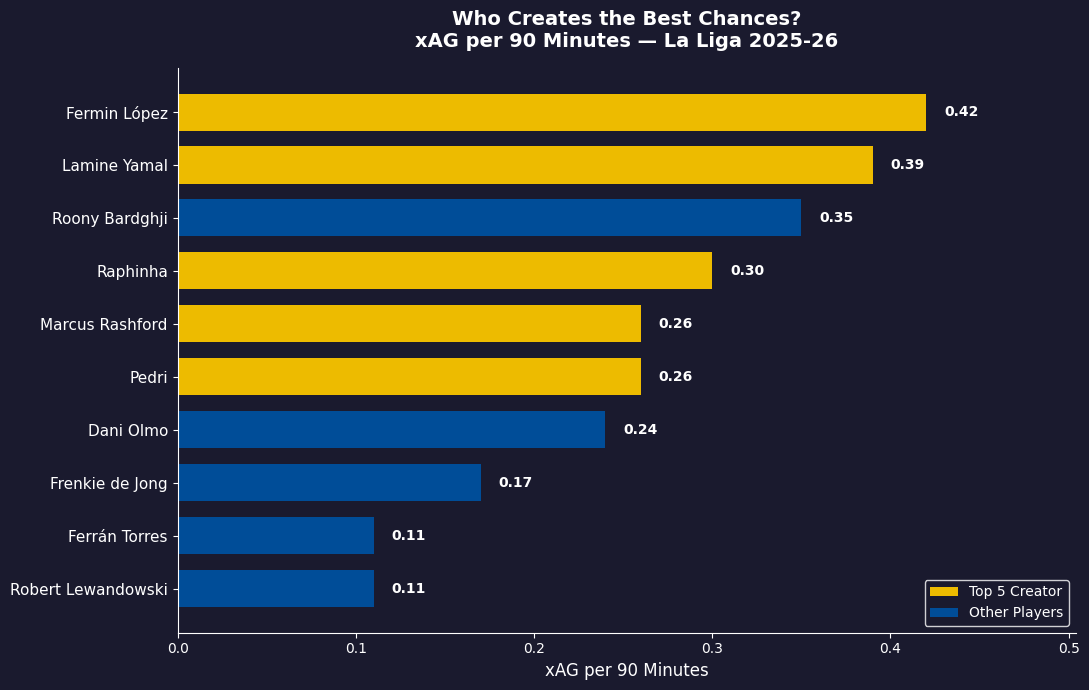


📊 Visualization 3 complete!


In [9]:
# VISUALIZATION 3: xAG per 90 — Horizontal Bar Chart

fig, ax = plt.subplots(figsize=(11, 7))
fig.patch.set_facecolor(BARCA_DARK)
ax.set_facecolor(BARCA_DARK)

# Get top 10 by xAG per 90
top10_xag90 = df_filtered.nlargest(10, 'xAG90')[['Player', 'xAG90']].copy()
top10_xag90 = top10_xag90.sort_values('xAG90', ascending=True)

y_pos = np.arange(len(top10_xag90))

# Color top 5 creators differently
colors_bar = [BARCA_GOLD if p in TOP5_CREATORS else BARCA_BLUE for p in top10_xag90['Player']]

# Create bars
bars = ax.barh(y_pos, top10_xag90['xAG90'], 0.7, color=colors_bar)

# Add value labels at end of each bar
for bar, val in zip(bars, top10_xag90['xAG90']):
    ax.text(val + 0.01, bar.get_y() + bar.get_height()/2, f'{val:.2f}', 
            va='center', ha='left', color='white', fontsize=10, fontweight='bold')

# Customize
ax.set_yticks(y_pos)
ax.set_yticklabels(top10_xag90['Player'], fontsize=11)
ax.set_xlabel('xAG per 90 Minutes', fontsize=12, color='white')
ax.set_title("Who Creates the Best Chances?\nxAG per 90 Minutes — La Liga 2025-26", 
             fontsize=14, fontweight='bold', color='white', pad=15)
ax.set_xlim(0, max(top10_xag90['xAG90']) * 1.2)

# Add legend
legend_elements = [mpatches.Patch(facecolor=BARCA_GOLD, label='Top 5 Creator'),
                   mpatches.Patch(facecolor=BARCA_BLUE, label='Other Players')]
ax.legend(handles=legend_elements, loc='lower right', facecolor=BARCA_DARK, 
          edgecolor='white', labelcolor='white')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

plt.tight_layout()
plt.show()

print("\n📊 Visualization 3 complete!")

---
# 📊 VISUALIZATION 4: Assists per 90 (Horizontal Bar Chart)

**Purpose:** Rank players by actual assists per 90 minutes.

Same structure as Visualization 3, different metric.

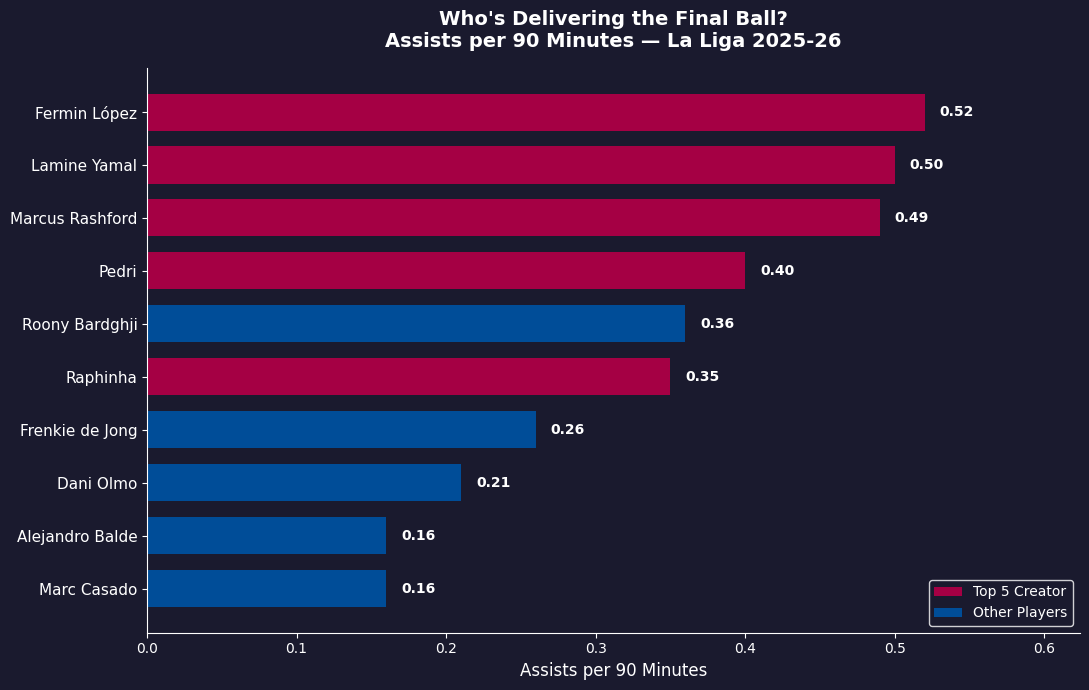


📊 Visualization 4 complete!


In [10]:
# VISUALIZATION 4: Assists per 90 — Horizontal Bar Chart

fig, ax = plt.subplots(figsize=(11, 7))
fig.patch.set_facecolor(BARCA_DARK)
ax.set_facecolor(BARCA_DARK)

top10_ast90 = df_filtered.nlargest(10, 'Ast90')[['Player', 'Ast90']].copy()
top10_ast90 = top10_ast90.sort_values('Ast90', ascending=True)

y_pos = np.arange(len(top10_ast90))
colors_bar = [BARCA_RED if p in TOP5_CREATORS else BARCA_BLUE for p in top10_ast90['Player']]

bars = ax.barh(y_pos, top10_ast90['Ast90'], 0.7, color=colors_bar)

for bar, val in zip(bars, top10_ast90['Ast90']):
    ax.text(val + 0.01, bar.get_y() + bar.get_height()/2, f'{val:.2f}', 
            va='center', ha='left', color='white', fontsize=10, fontweight='bold')

ax.set_yticks(y_pos)
ax.set_yticklabels(top10_ast90['Player'], fontsize=11)
ax.set_xlabel('Assists per 90 Minutes', fontsize=12, color='white')
ax.set_title("Who's Delivering the Final Ball?\nAssists per 90 Minutes — La Liga 2025-26", 
             fontsize=14, fontweight='bold', color='white', pad=15)
ax.set_xlim(0, max(top10_ast90['Ast90']) * 1.2)

legend_elements = [mpatches.Patch(facecolor=BARCA_RED, label='Top 5 Creator'),
                   mpatches.Patch(facecolor=BARCA_BLUE, label='Other Players')]
ax.legend(handles=legend_elements, loc='lower right', facecolor=BARCA_DARK, 
          edgecolor='white', labelcolor='white')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

plt.tight_layout()
plt.show()

print("\n📊 Visualization 4 complete!")

---
# 📊 VISUALIZATION 5: Progressive Actions (Grouped Bar Chart)

**Purpose:** Compare three types of ball progression: passes, carries, and receptions.

**Key Concepts:**
- Grouped bars use offset x positions
- `width` parameter controls bar thickness
- Multiple bar series on same axis

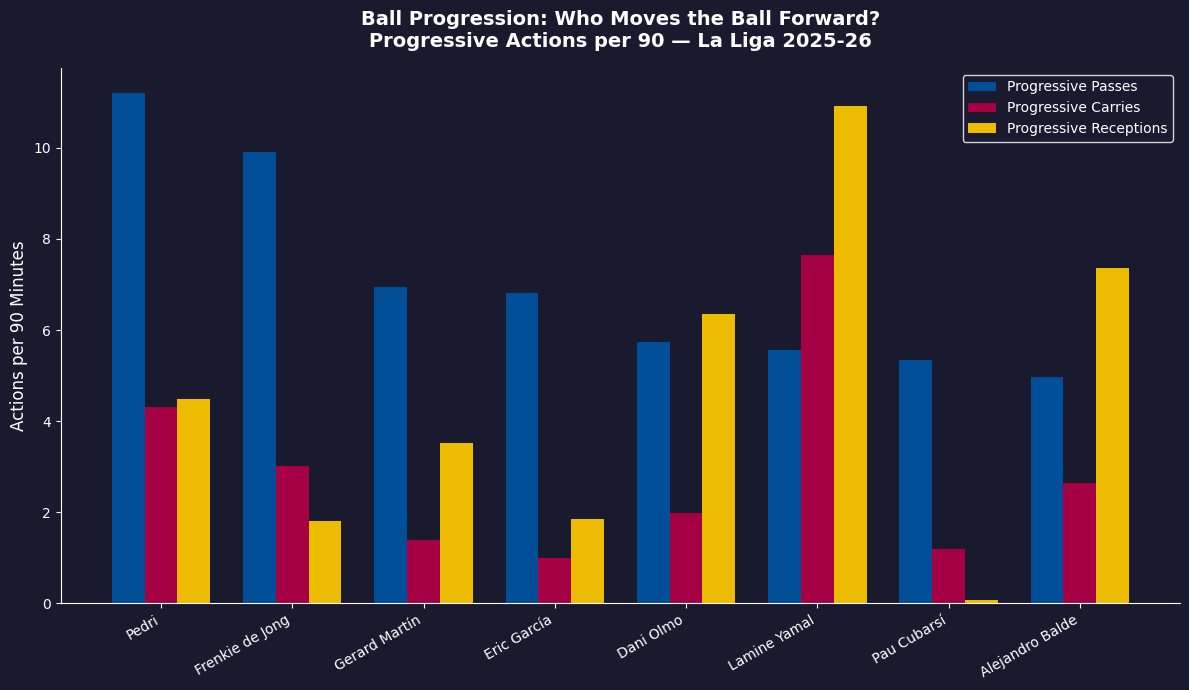


📊 Visualization 5 complete!


In [11]:
# VISUALIZATION 5: Progressive Actions per 90 — Grouped Bar Chart

fig, ax = plt.subplots(figsize=(12, 7))
fig.patch.set_facecolor(BARCA_DARK)
ax.set_facecolor(BARCA_DARK)

# Get top 8 by progressive passes per 90
top8_prg = df_filtered.nlargest(8, 'PrgP90')[['Player', 'PrgP90', 'PrgC90', 'PrgR90']].copy()

x = np.arange(len(top8_prg))  # Label locations
width = 0.25  # Width of each bar

# Create three sets of bars, offset from each other
bars1 = ax.bar(x - width, top8_prg['PrgP90'], width, label='Progressive Passes', color=BARCA_BLUE)
bars2 = ax.bar(x, top8_prg['PrgC90'], width, label='Progressive Carries', color=BARCA_RED)
bars3 = ax.bar(x + width, top8_prg['PrgR90'], width, label='Progressive Receptions', color=BARCA_GOLD)

ax.set_ylabel('Actions per 90 Minutes', fontsize=12, color='white')
ax.set_title("Ball Progression: Who Moves the Ball Forward?\nProgressive Actions per 90 — La Liga 2025-26", 
             fontsize=14, fontweight='bold', color='white', pad=15)
ax.set_xticks(x)
ax.set_xticklabels(top8_prg['Player'], rotation=30, ha='right', fontsize=10)

ax.legend(loc='upper right', facecolor=BARCA_DARK, edgecolor='white', labelcolor='white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

plt.tight_layout()
plt.show()

print("\n📊 Visualization 5 complete!")

---
# 📊 VISUALIZATIONS 6-13: Radar & Pizza Charts

For player profiles, we use two complementary chart types:

| Chart Type | Best For |
|------------|----------|
| **Radar** | Showing overall shape/balance of a player's skills |
| **Pizza** | Showing percentile rankings within the squad |

Let's create reusable functions for both.

In [12]:
# Define metrics for radar/pizza charts
RADAR_METRICS = ['Ast90', 'xAG90', 'PrgP90', 'PrgC90', 'PrgR90', 'G+A90']
RADAR_LABELS = ['Assists\nper 90', 'xAG\nper 90', 'Prog Passes\nper 90', 
                'Prog Carries\nper 90', 'Prog Recep\nper 90', 'G+A\nper 90']

def create_radar_chart(player_name, df_data, metrics, labels, color):
    """
    Creates a radar chart for a single player.
    
    Parameters:
    - player_name: Name of the player
    - df_data: DataFrame containing player data
    - metrics: List of column names to plot
    - labels: Display labels for each metric
    - color: Color for the radar fill
    """
    # Get player data
    player_data = df_data[df_data['Player'] == player_name].iloc[0]
    
    # Calculate angles for radar chart
    N = len(metrics)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # Close the polygon
    
    # Get values and normalize to 0-100 scale
    values = [player_data[m] for m in metrics]
    max_vals = [df_data[m].max() for m in metrics]
    normalized = [(v / mx * 100) if mx > 0 else 0 for v, mx in zip(values, max_vals)]
    normalized += normalized[:1]  # Close the polygon
    
    # Create polar plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    fig.patch.set_facecolor(BARCA_DARK)
    ax.set_facecolor(BARCA_DARK)
    
    # Plot data
    ax.plot(angles, normalized, 'o-', linewidth=2.5, color=color, markersize=8)
    ax.fill(angles, normalized, alpha=0.35, color=color)
    
    # Customize
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=10, color='white')
    ax.set_ylim(0, 100)
    ax.set_yticklabels([])
    ax.spines['polar'].set_color('white')
    ax.grid(color='white', alpha=0.3)
    
    ax.set_title(f"{player_name}\nCreative Profile — Radar Chart", 
                 fontsize=14, fontweight='bold', color='white', pad=20)
    
    plt.tight_layout()
    plt.show()

print("✅ Radar chart function defined!")

✅ Radar chart function defined!


In [13]:
def create_pizza_chart(player_name, df_data, metrics, labels, color):
    """
    Creates a pizza/percentile chart for a single player.
    
    Shows where the player ranks within the squad for each metric.
    """
    # Get player data
    player_data = df_data[df_data['Player'] == player_name].iloc[0]
    
    N = len(metrics)
    
    # Calculate percentile ranks
    percentiles = []
    for m in metrics:
        val = player_data[m]
        squad_vals = df_data[m].dropna()
        pct = (squad_vals < val).sum() / len(squad_vals) * 100
        percentiles.append(pct)
    
    # Calculate angles
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    
    # Create polar plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    fig.patch.set_facecolor(BARCA_DARK)
    ax.set_facecolor(BARCA_DARK)
    
    # Create bars (pizza slices)
    width = 2 * np.pi / N * 0.85
    bars = ax.bar(angles, percentiles, width=width, bottom=0,
                  color=color, alpha=0.8, edgecolor='white', linewidth=1.5)
    
    # Add percentage labels
    for angle, pct in zip(angles, percentiles):
        ax.text(angle, pct + 5, f'{pct:.0f}', ha='center', va='bottom', 
                fontsize=9, fontweight='bold', color='white')
    
    # Customize
    ax.set_xticks(angles)
    ax.set_xticklabels(labels, fontsize=9, color='white')
    ax.set_ylim(0, 100)
    ax.set_yticklabels([])
    ax.spines['polar'].set_color('white')
    ax.grid(color='white', alpha=0.2)
    
    ax.set_title(f"{player_name}\nSquad Percentile Ranks — Pizza Chart", 
                 fontsize=14, fontweight='bold', color='white', pad=20)
    
    plt.tight_layout()
    plt.show()

print("✅ Pizza chart function defined!")

✅ Pizza chart function defined!


### Visualization 6 & 7: Lamine Yamal

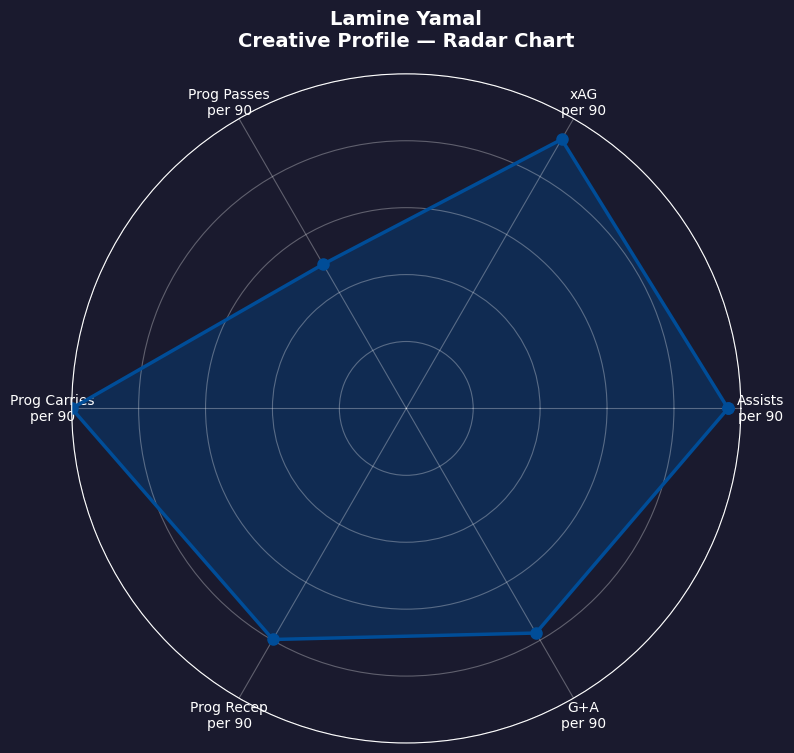


📊 Visualization 6 complete!


In [14]:
# VISUALIZATION 6: Lamine Yamal — Radar Chart
create_radar_chart('Lamine Yamal', df_filtered, RADAR_METRICS, RADAR_LABELS, BARCA_BLUE)
print("\n📊 Visualization 6 complete!")

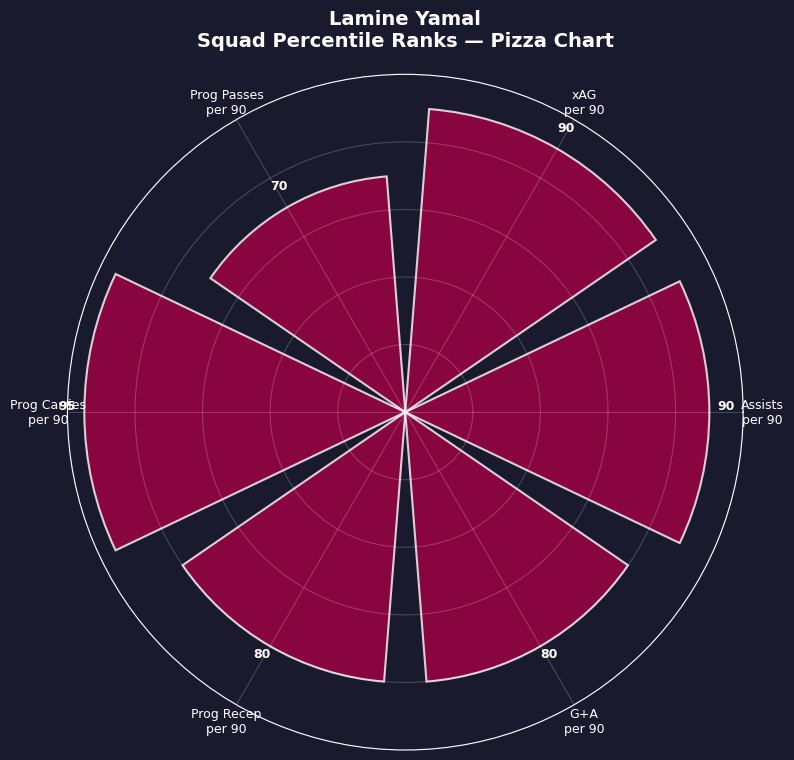


📊 Visualization 7 complete!


In [15]:
# VISUALIZATION 7: Lamine Yamal — Pizza Chart
create_pizza_chart('Lamine Yamal', df_filtered, RADAR_METRICS, RADAR_LABELS, BARCA_RED)
print("\n📊 Visualization 7 complete!")

### Visualization 8 & 9: Pedri

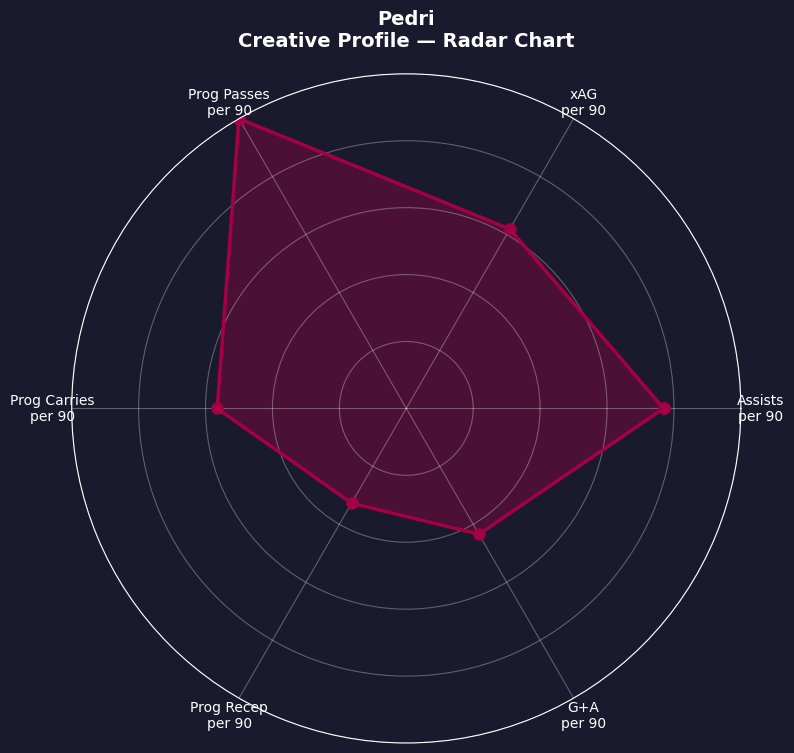


📊 Visualization 8 complete!


In [16]:
# VISUALIZATION 8: Pedri — Radar Chart
create_radar_chart('Pedri', df_filtered, RADAR_METRICS, RADAR_LABELS, BARCA_RED)
print("\n📊 Visualization 8 complete!")

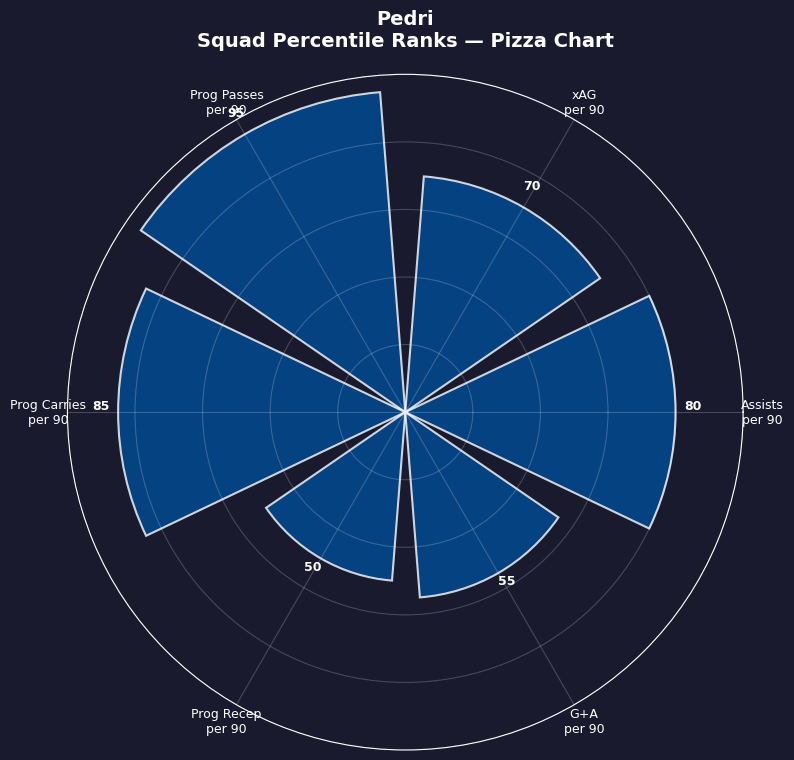


📊 Visualization 9 complete!


In [17]:
# VISUALIZATION 9: Pedri — Pizza Chart
create_pizza_chart('Pedri', df_filtered, RADAR_METRICS, RADAR_LABELS, BARCA_BLUE)
print("\n📊 Visualization 9 complete!")

### Visualization 10 & 11: Raphinha

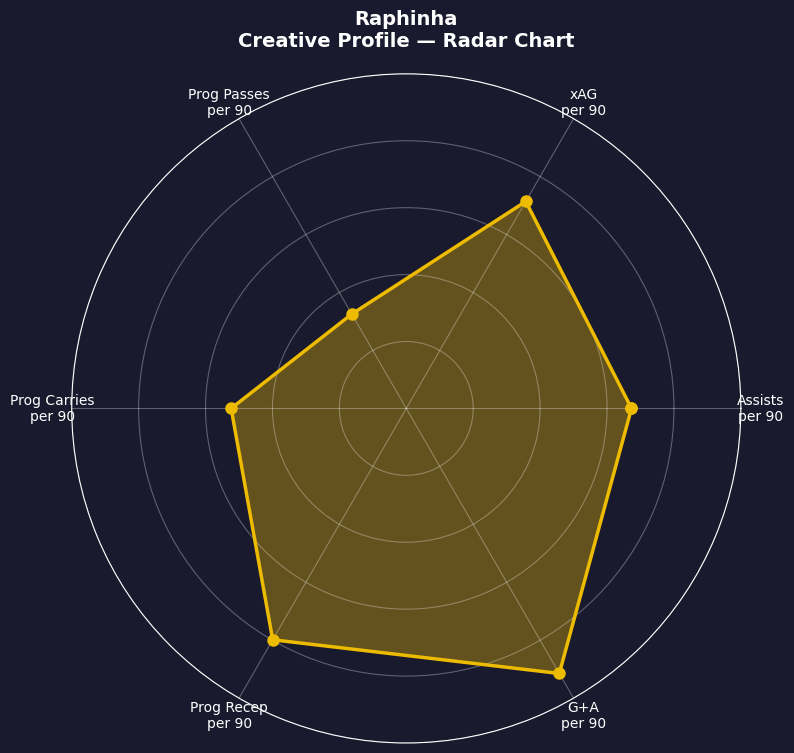


📊 Visualization 10 complete!


In [18]:
# VISUALIZATION 10: Raphinha — Radar Chart
create_radar_chart('Raphinha', df_filtered, RADAR_METRICS, RADAR_LABELS, BARCA_GOLD)
print("\n📊 Visualization 10 complete!")

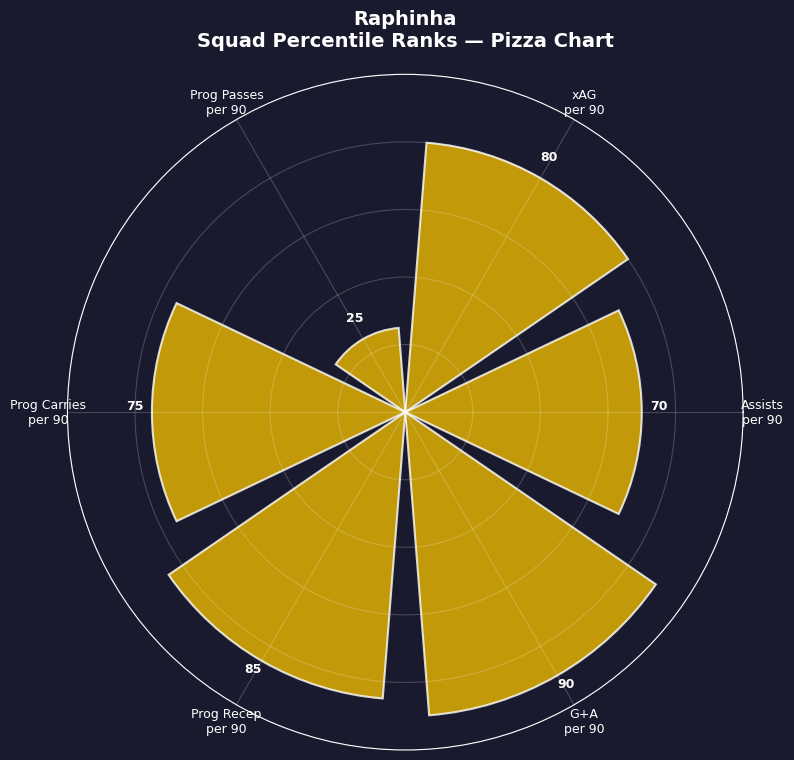


📊 Visualization 11 complete!


In [19]:
# VISUALIZATION 11: Raphinha — Pizza Chart
create_pizza_chart('Raphinha', df_filtered, RADAR_METRICS, RADAR_LABELS, BARCA_GOLD)
print("\n📊 Visualization 11 complete!")

### Visualization 12 & 13: Marcus Rashford

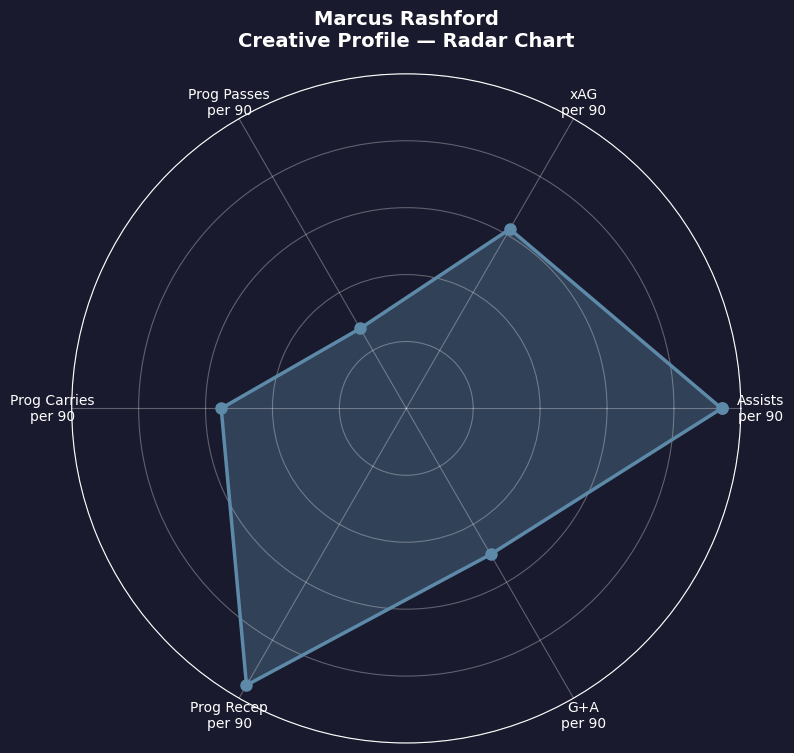


📊 Visualization 12 complete!


In [20]:
# VISUALIZATION 12: Rashford — Radar Chart
create_radar_chart('Marcus Rashford', df_filtered, RADAR_METRICS, RADAR_LABELS, '#5D8AA8')
print("\n📊 Visualization 12 complete!")

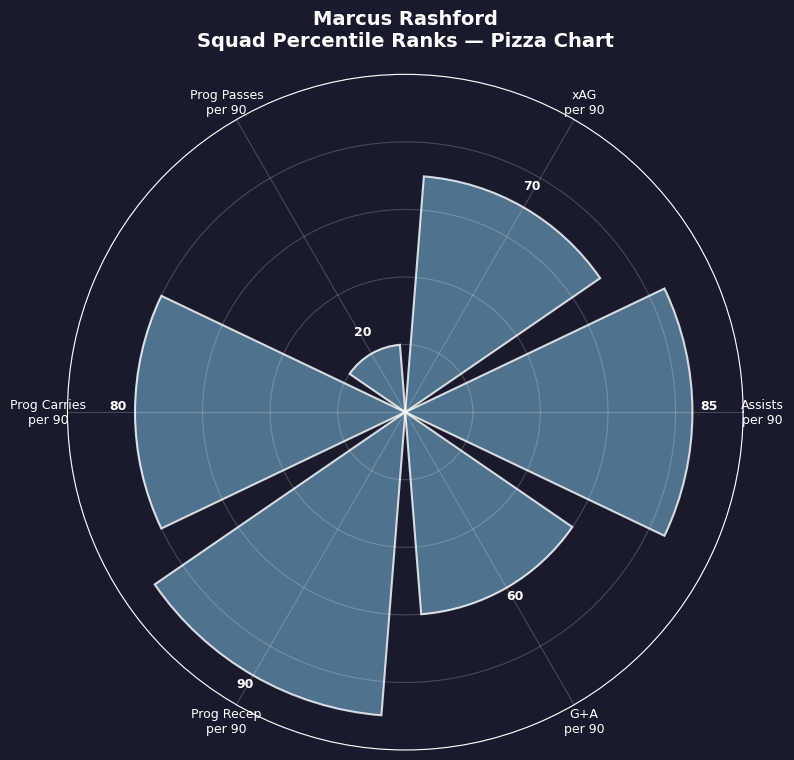


📊 Visualization 13 complete!


In [21]:
# VISUALIZATION 13: Rashford — Pizza Chart
create_pizza_chart('Marcus Rashford', df_filtered, RADAR_METRICS, RADAR_LABELS, '#5D8AA8')
print("\n📊 Visualization 13 complete!")

---
# 📊 VISUALIZATION 14: Head-to-Head Comparison

**Purpose:** Compare all 5 top creators side-by-side across multiple metrics.

**Key Concepts:**
- Multiple bar series with different offsets
- Comparing 5 players across 5 metrics

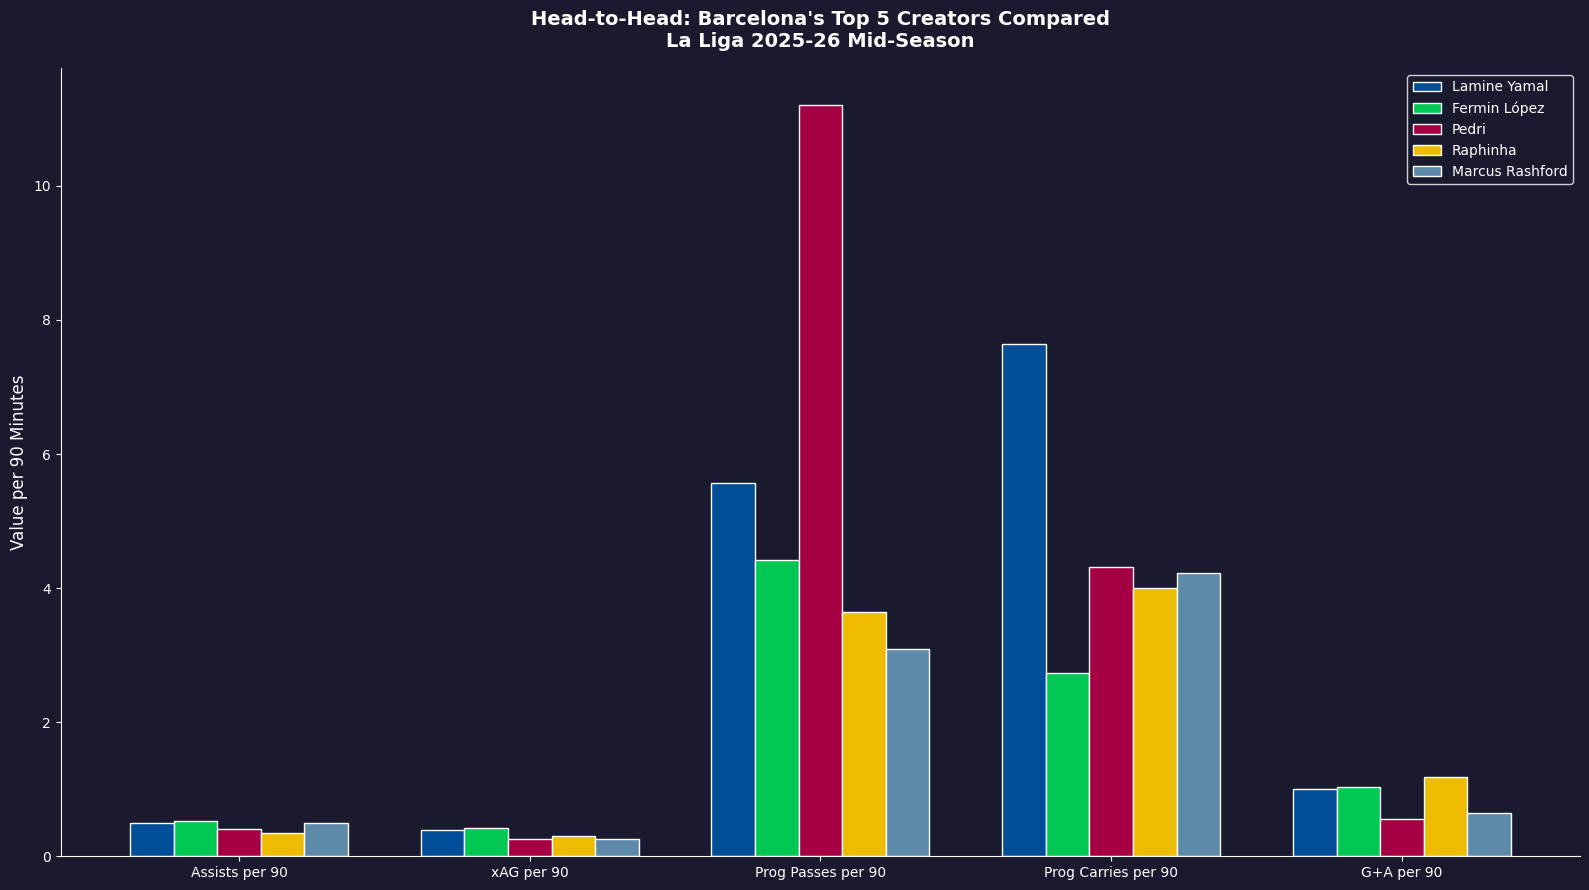


📊 Visualization 14 complete!


In [22]:
# VISUALIZATION 14: Top 5 Creators — Head-to-Head Comparison

fig, ax = plt.subplots(figsize=(16, 9))
fig.patch.set_facecolor(BARCA_DARK)
ax.set_facecolor(BARCA_DARK)

# Define metrics and players
comparison_metrics = ['Ast90', 'xAG90', 'PrgP90', 'PrgC90', 'G+A90']
comparison_labels = ['Assists per 90', 'xAG per 90', 'Prog Passes per 90', 
                     'Prog Carries per 90', 'G+A per 90']
players_list = ['Lamine Yamal', 'Fermin López', 'Pedri', 'Raphinha', 'Marcus Rashford']
player_colors = [BARCA_BLUE, FERMIN_GREEN, BARCA_RED, BARCA_GOLD, '#5D8AA8']

x = np.arange(len(comparison_metrics))
width = 0.15
offsets = [-2, -1, 0, 1, 2]

# Create bars for each player
for player, color, offset in zip(players_list, player_colors, offsets):
    pdata = df_filtered[df_filtered['Player'] == player].iloc[0]
    values = [pdata[m] for m in comparison_metrics]
    ax.bar(x + offset * width, values, width, label=player, color=color, edgecolor='white')

ax.set_ylabel('Value per 90 Minutes', fontsize=12, color='white')
ax.set_title("Head-to-Head: Barcelona's Top 5 Creators Compared\nLa Liga 2025-26 Mid-Season", 
             fontsize=14, fontweight='bold', color='white', pad=15)
ax.set_xticks(x)
ax.set_xticklabels(comparison_labels, fontsize=10)

ax.legend(loc='upper right', facecolor=BARCA_DARK, edgecolor='white', labelcolor='white', fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(colors='white')

plt.tight_layout()
plt.show()

print("\n📊 Visualization 14 complete!")

---
# 📊 VISUALIZATIONS 15-18: Scatter Plots

Scatter plots are powerful for showing relationships between two variables.

**Key Concepts:**
- `ax.scatter()` for scatter plots
- Player labels with `ax.annotate()`
- Reference lines with `ax.axhline()` and `ax.axvline()`
- Quadrant labels for interpretation

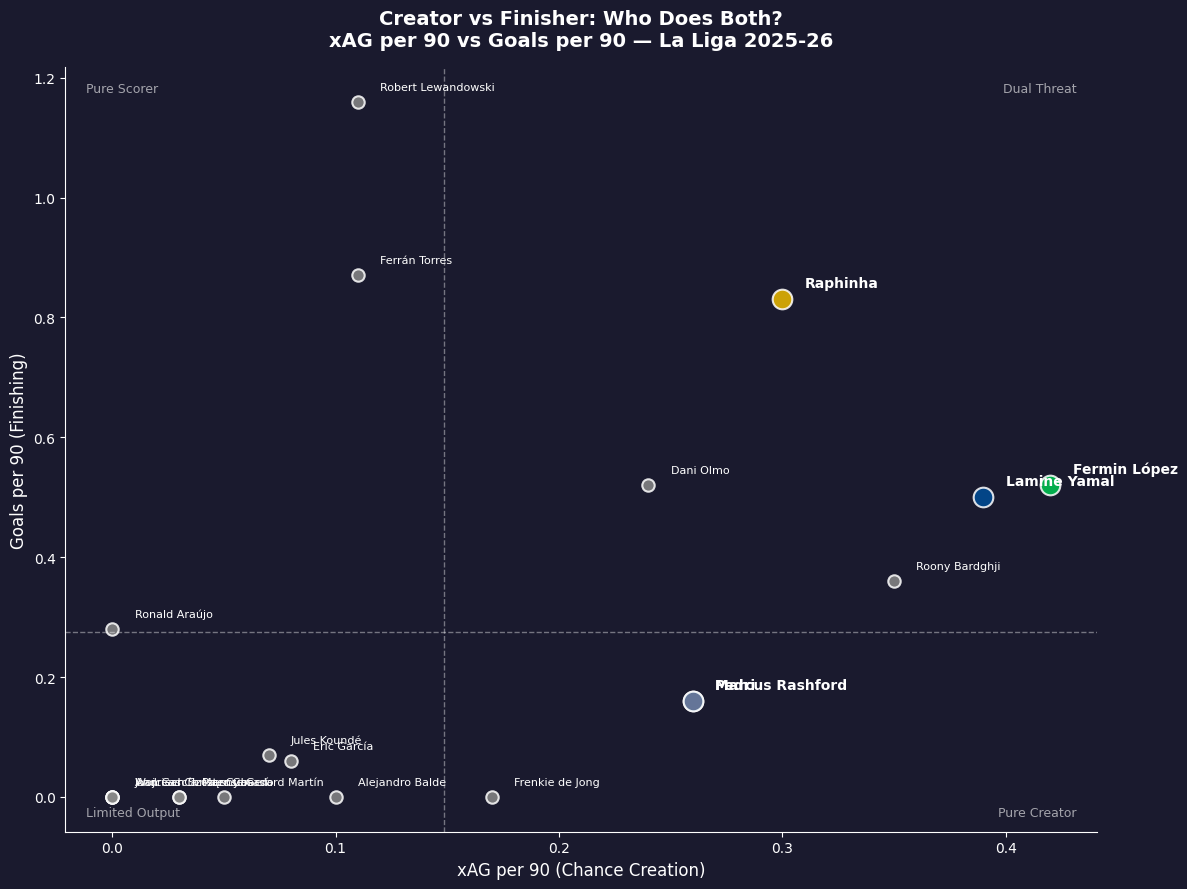


📊 Visualization 15 complete!


In [23]:
# VISUALIZATION 15: Creator vs Finisher — Scatter Plot

fig, ax = plt.subplots(figsize=(12, 9))
fig.patch.set_facecolor(BARCA_DARK)
ax.set_facecolor(BARCA_DARK)

# Plot each player
for _, row in df_filtered.iterrows():
    ax.scatter(row['xAG90'], row['Gls90'], 
               c=get_player_color(row['Player']), 
               s=get_marker_size(row['Player']),
               alpha=0.85, edgecolors='white', linewidths=1.5)

# Add player labels
for _, row in df_filtered.iterrows():
    fontsize = 10 if row['Player'] in TOP5_CREATORS else 8
    fontweight = 'bold' if row['Player'] in TOP5_CREATORS else 'normal'
    ax.annotate(row['Player'], (row['xAG90'] + 0.01, row['Gls90'] + 0.02),
                fontsize=fontsize, color='white', fontweight=fontweight)

# Add quadrant lines (at average values)
avg_xag = df_filtered['xAG90'].mean()
avg_gls = df_filtered['Gls90'].mean()
ax.axhline(y=avg_gls, color='white', linestyle='--', alpha=0.4, linewidth=1)
ax.axvline(x=avg_xag, color='white', linestyle='--', alpha=0.4, linewidth=1)

# Add quadrant labels
ax.text(0.02, 0.98, 'Pure Scorer', transform=ax.transAxes, fontsize=9, color='white', alpha=0.6, va='top')
ax.text(0.98, 0.98, 'Dual Threat', transform=ax.transAxes, fontsize=9, color='white', alpha=0.6, va='top', ha='right')
ax.text(0.02, 0.02, 'Limited Output', transform=ax.transAxes, fontsize=9, color='white', alpha=0.6)
ax.text(0.98, 0.02, 'Pure Creator', transform=ax.transAxes, fontsize=9, color='white', alpha=0.6, ha='right')

ax.set_xlabel('xAG per 90 (Chance Creation)', fontsize=12, color='white')
ax.set_ylabel('Goals per 90 (Finishing)', fontsize=12, color='white')
ax.set_title("Creator vs Finisher: Who Does Both?\nxAG per 90 vs Goals per 90 — La Liga 2025-26", 
             fontsize=14, fontweight='bold', color='white', pad=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

plt.tight_layout()
plt.show()

print("\n📊 Visualization 15 complete!")

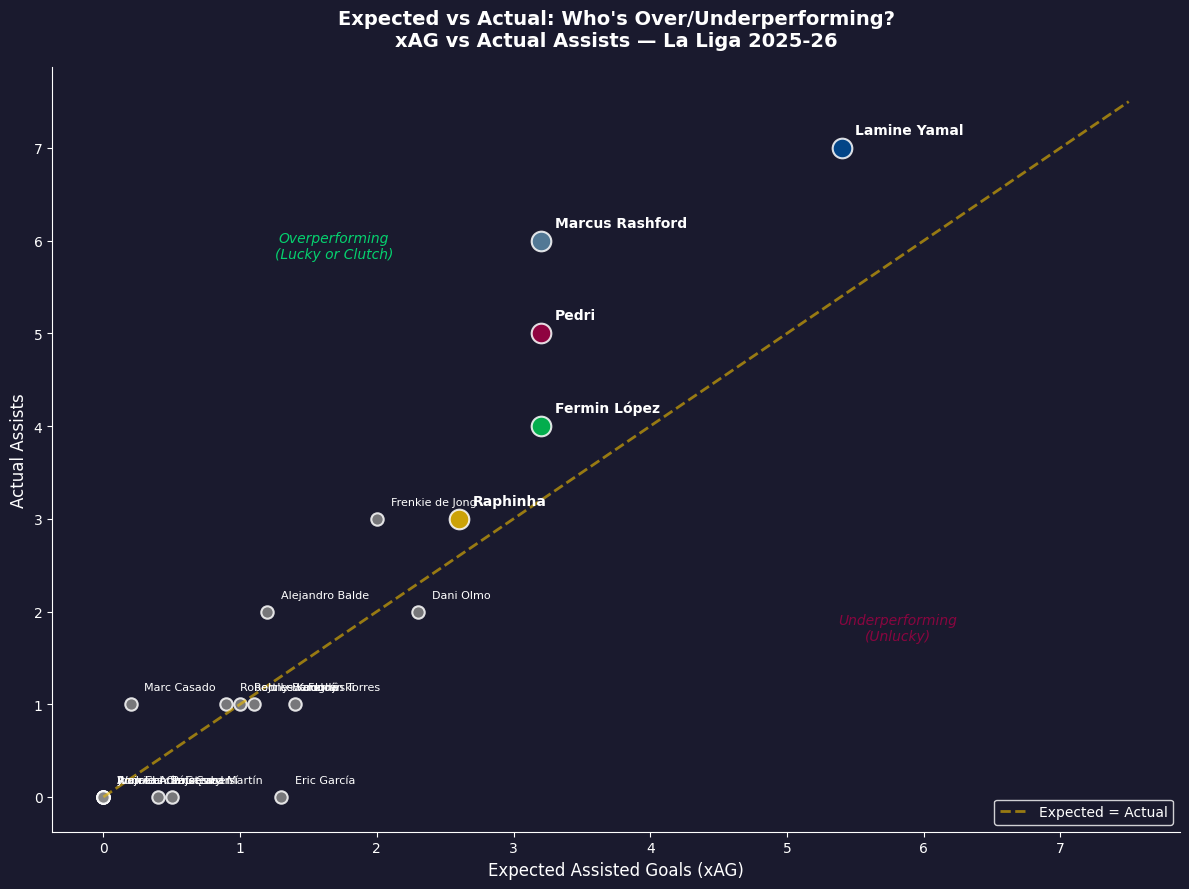


📊 Visualization 16 complete!


In [24]:
# VISUALIZATION 16: Expected vs Actual — Scatter Plot

fig, ax = plt.subplots(figsize=(12, 9))
fig.patch.set_facecolor(BARCA_DARK)
ax.set_facecolor(BARCA_DARK)

for _, row in df_filtered.iterrows():
    ax.scatter(row['xAG'], row['Ast'], 
               c=get_player_color(row['Player']), 
               s=get_marker_size(row['Player']),
               alpha=0.85, edgecolors='white', linewidths=1.5)

for _, row in df_filtered.iterrows():
    fontsize = 10 if row['Player'] in TOP5_CREATORS else 8
    fontweight = 'bold' if row['Player'] in TOP5_CREATORS else 'normal'
    ax.annotate(row['Player'], (row['xAG'] + 0.1, row['Ast'] + 0.15),
                fontsize=fontsize, color='white', fontweight=fontweight)

# Add diagonal line (perfect conversion: xAG = Assists)
max_val = max(df_filtered['xAG'].max(), df_filtered['Ast'].max()) + 0.5
ax.plot([0, max_val], [0, max_val], color=BARCA_GOLD, linestyle='--', alpha=0.6, 
        linewidth=2, label='Expected = Actual')

# Add annotations
ax.text(0.75, 0.25, 'Underperforming\n(Unlucky)', transform=ax.transAxes, fontsize=10, 
        color=BARCA_RED, alpha=0.8, ha='center', style='italic')
ax.text(0.25, 0.75, 'Overperforming\n(Lucky or Clutch)', transform=ax.transAxes, fontsize=10, 
        color='#00FF7F', alpha=0.8, ha='center', style='italic')

ax.set_xlabel('Expected Assisted Goals (xAG)', fontsize=12, color='white')
ax.set_ylabel('Actual Assists', fontsize=12, color='white')
ax.set_title("Expected vs Actual: Who's Over/Underperforming?\nxAG vs Actual Assists — La Liga 2025-26", 
             fontsize=14, fontweight='bold', color='white', pad=15)

ax.legend(loc='lower right', facecolor=BARCA_DARK, edgecolor='white', labelcolor='white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

plt.tight_layout()
plt.show()

print("\n📊 Visualization 16 complete!")

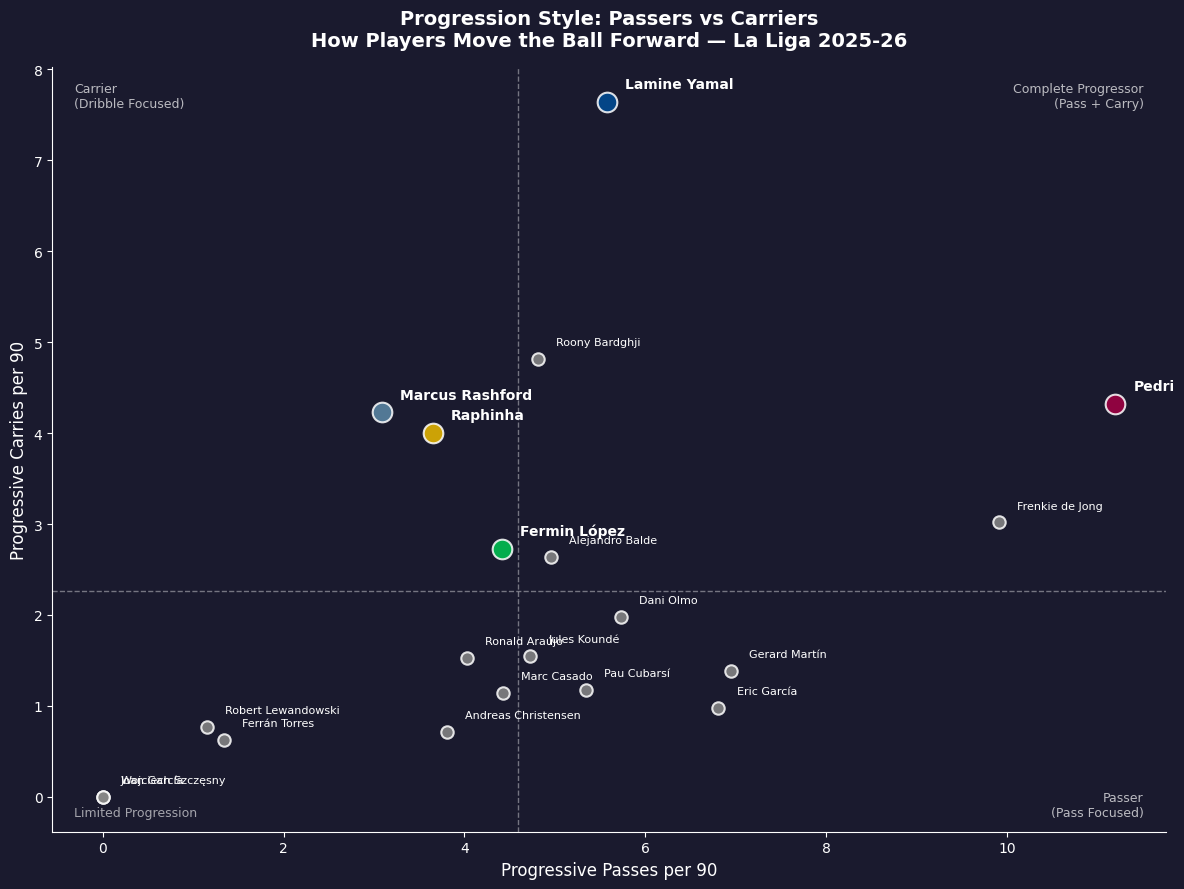


📊 Visualization 17 complete!


In [25]:
# VISUALIZATION 17: Progression Style — Scatter Plot

fig, ax = plt.subplots(figsize=(12, 9))
fig.patch.set_facecolor(BARCA_DARK)
ax.set_facecolor(BARCA_DARK)

for _, row in df_filtered.iterrows():
    ax.scatter(row['PrgP90'], row['PrgC90'], 
               c=get_player_color(row['Player']), 
               s=get_marker_size(row['Player']),
               alpha=0.85, edgecolors='white', linewidths=1.5)

for _, row in df_filtered.iterrows():
    fontsize = 10 if row['Player'] in TOP5_CREATORS else 8
    fontweight = 'bold' if row['Player'] in TOP5_CREATORS else 'normal'
    ax.annotate(row['Player'], (row['PrgP90'] + 0.2, row['PrgC90'] + 0.15),
                fontsize=fontsize, color='white', fontweight=fontweight)

# Add quadrant lines
avg_prgp = df_filtered['PrgP90'].mean()
avg_prgc = df_filtered['PrgC90'].mean()
ax.axhline(y=avg_prgc, color='white', linestyle='--', alpha=0.4, linewidth=1)
ax.axvline(x=avg_prgp, color='white', linestyle='--', alpha=0.4, linewidth=1)

# Add quadrant labels
ax.text(0.02, 0.98, 'Carrier\n(Dribble Focused)', transform=ax.transAxes, fontsize=9, color='white', alpha=0.7, va='top')
ax.text(0.98, 0.98, 'Complete Progressor\n(Pass + Carry)', transform=ax.transAxes, fontsize=9, color='white', alpha=0.7, va='top', ha='right')
ax.text(0.02, 0.02, 'Limited Progression', transform=ax.transAxes, fontsize=9, color='white', alpha=0.6)
ax.text(0.98, 0.02, 'Passer\n(Pass Focused)', transform=ax.transAxes, fontsize=9, color='white', alpha=0.7, ha='right')

ax.set_xlabel('Progressive Passes per 90', fontsize=12, color='white')
ax.set_ylabel('Progressive Carries per 90', fontsize=12, color='white')
ax.set_title("Progression Style: Passers vs Carriers\nHow Players Move the Ball Forward — La Liga 2025-26", 
             fontsize=14, fontweight='bold', color='white', pad=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

plt.tight_layout()
plt.show()

print("\n📊 Visualization 17 complete!")

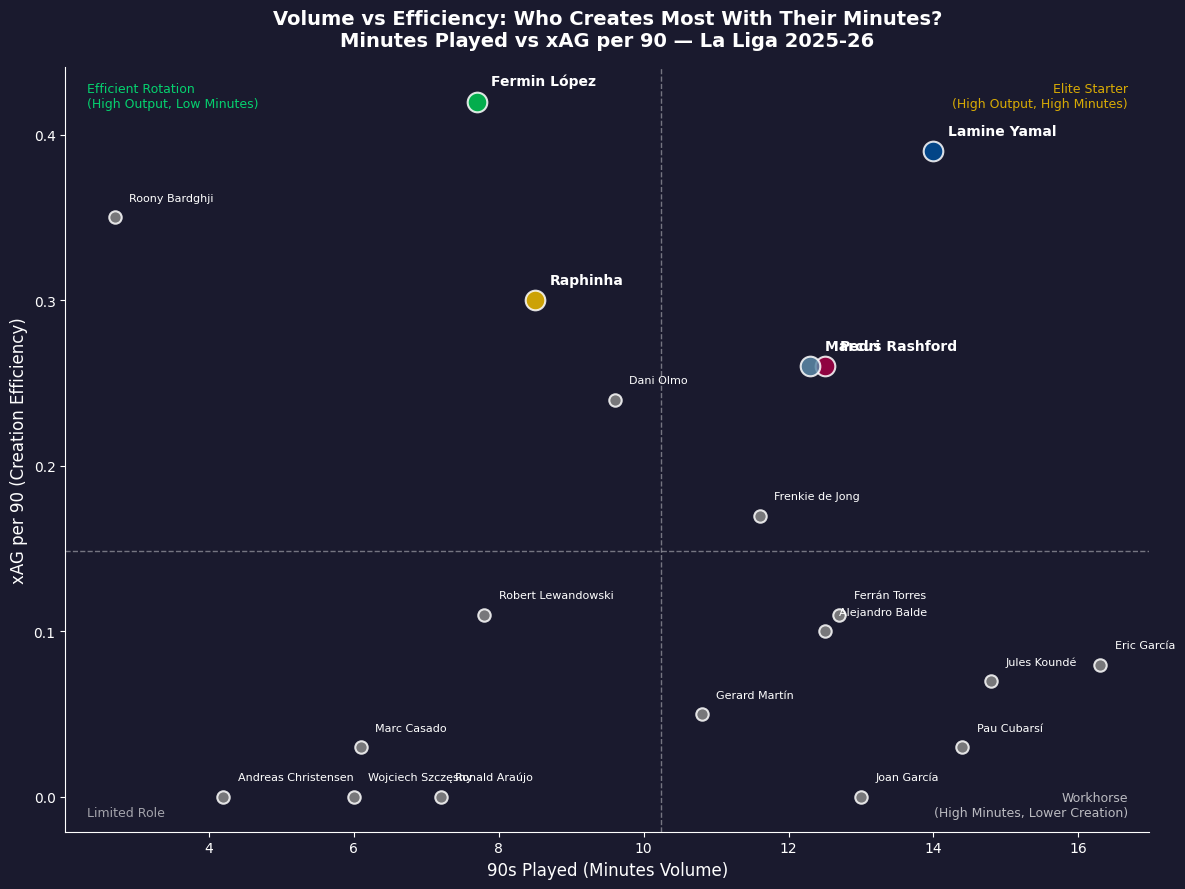


📊 Visualization 18 complete!


In [26]:
# VISUALIZATION 18: Volume vs Efficiency — Scatter Plot

fig, ax = plt.subplots(figsize=(12, 9))
fig.patch.set_facecolor(BARCA_DARK)
ax.set_facecolor(BARCA_DARK)

for _, row in df_filtered.iterrows():
    ax.scatter(row['90s'], row['xAG90'], 
               c=get_player_color(row['Player']), 
               s=get_marker_size(row['Player']),
               alpha=0.85, edgecolors='white', linewidths=1.5)

for _, row in df_filtered.iterrows():
    fontsize = 10 if row['Player'] in TOP5_CREATORS else 8
    fontweight = 'bold' if row['Player'] in TOP5_CREATORS else 'normal'
    ax.annotate(row['Player'], (row['90s'] + 0.2, row['xAG90'] + 0.01),
                fontsize=fontsize, color='white', fontweight=fontweight)

# Add quadrant lines
avg_90s = df_filtered['90s'].mean()
avg_xag90 = df_filtered['xAG90'].mean()
ax.axhline(y=avg_xag90, color='white', linestyle='--', alpha=0.4, linewidth=1)
ax.axvline(x=avg_90s, color='white', linestyle='--', alpha=0.4, linewidth=1)

# Add quadrant labels
ax.text(0.02, 0.98, 'Efficient Rotation\n(High Output, Low Minutes)', transform=ax.transAxes, 
        fontsize=9, color='#00FF7F', alpha=0.8, va='top')
ax.text(0.98, 0.98, 'Elite Starter\n(High Output, High Minutes)', transform=ax.transAxes, 
        fontsize=9, color=BARCA_GOLD, alpha=0.9, va='top', ha='right')
ax.text(0.02, 0.02, 'Limited Role', transform=ax.transAxes, fontsize=9, color='white', alpha=0.6)
ax.text(0.98, 0.02, 'Workhorse\n(High Minutes, Lower Creation)', transform=ax.transAxes, 
        fontsize=9, color='white', alpha=0.7, ha='right')

ax.set_xlabel('90s Played (Minutes Volume)', fontsize=12, color='white')
ax.set_ylabel('xAG per 90 (Creation Efficiency)', fontsize=12, color='white')
ax.set_title("Volume vs Efficiency: Who Creates Most With Their Minutes?\nMinutes Played vs xAG per 90 — La Liga 2025-26", 
             fontsize=14, fontweight='bold', color='white', pad=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

plt.tight_layout()
plt.show()

print("\n📊 Visualization 18 complete!")

---
# 📊 VISUALIZATIONS 19-20: Fermín López

Fermín leads the squad in xAG per 90 — he deserves his own spotlight!

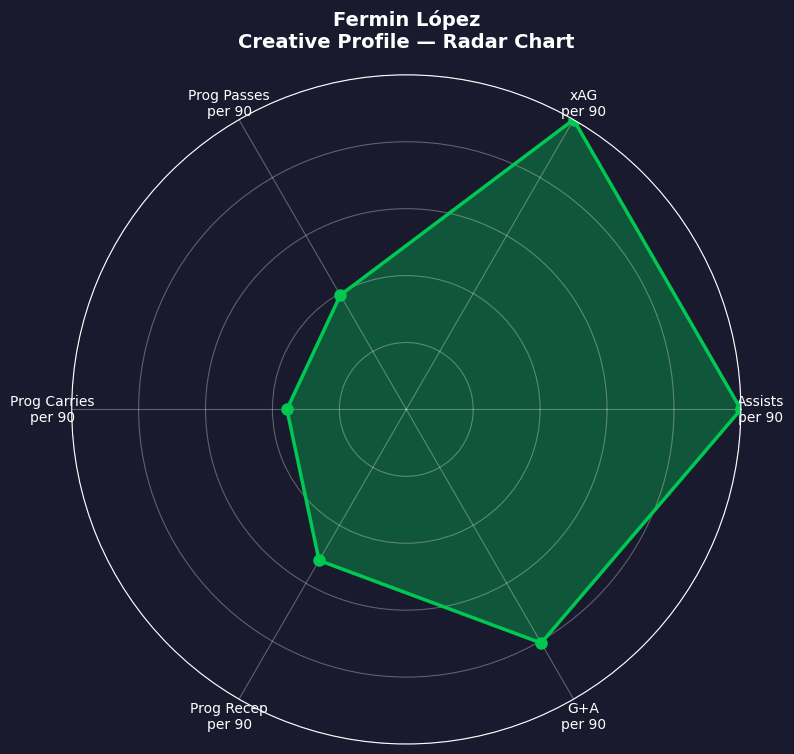


📊 Visualization 19 complete!


In [27]:
# VISUALIZATION 19: Fermín López — Radar Chart
create_radar_chart('Fermin López', df_filtered, RADAR_METRICS, RADAR_LABELS, FERMIN_GREEN)
print("\n📊 Visualization 19 complete!")

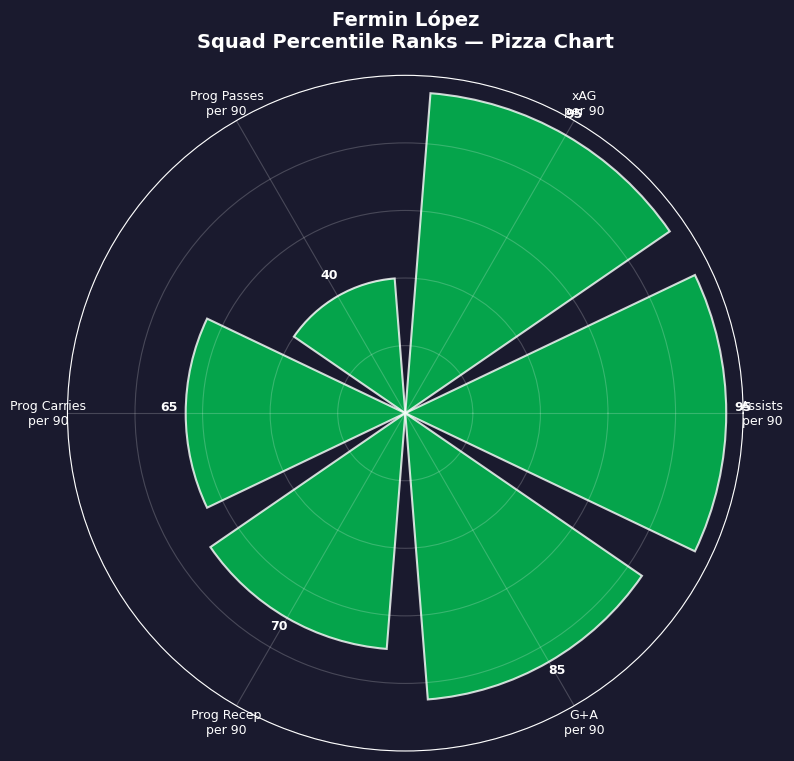


📊 Visualization 20 complete!


In [28]:
# VISUALIZATION 20: Fermín López — Pizza Chart
create_pizza_chart('Fermin López', df_filtered, RADAR_METRICS, RADAR_LABELS, FERMIN_GREEN)
print("\n📊 Visualization 20 complete!")

---
# 💾 Section 19: Saving Your Visualizations

To save any visualization as a PNG file, use `plt.savefig()` before `plt.show()`.

**Example:**

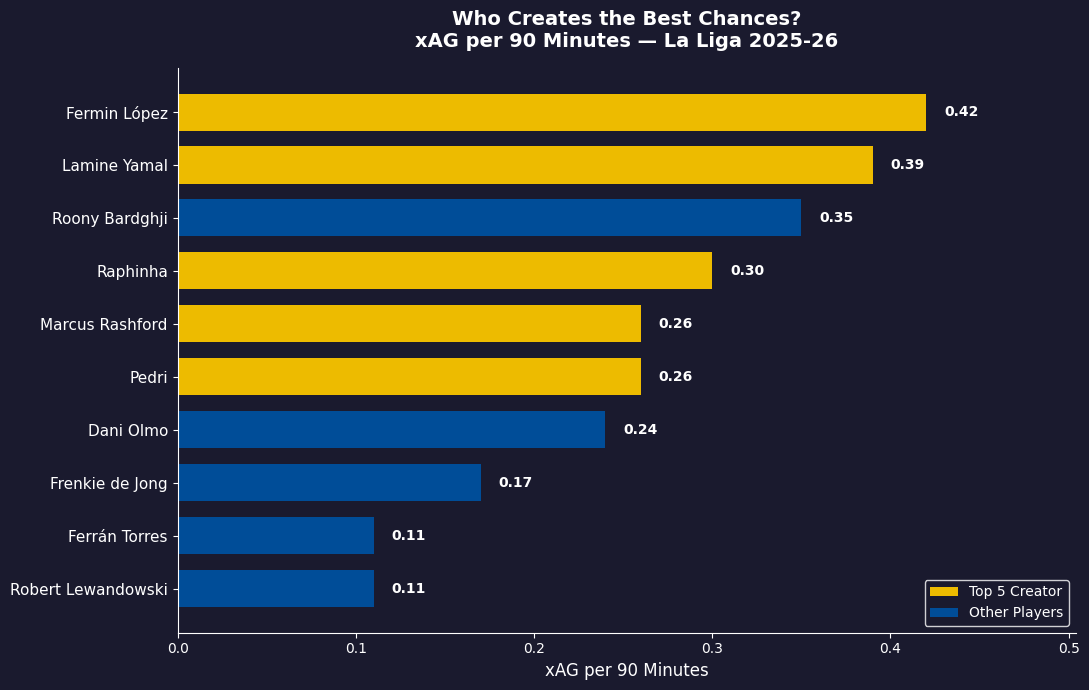


✅ Chart saved as 'xag_per90_chart.png'!
In Colab: Click the folder icon → find the file → right-click → Download


In [29]:
# Example: Save a visualization to file

# Recreate a chart
fig, ax = plt.subplots(figsize=(11, 7))
fig.patch.set_facecolor(BARCA_DARK)
ax.set_facecolor(BARCA_DARK)

top10_xag90 = df_filtered.nlargest(10, 'xAG90')[['Player', 'xAG90']].copy()
top10_xag90 = top10_xag90.sort_values('xAG90', ascending=True)
y_pos = np.arange(len(top10_xag90))
colors_bar = [BARCA_GOLD if p in TOP5_CREATORS else BARCA_BLUE for p in top10_xag90['Player']]
bars = ax.barh(y_pos, top10_xag90['xAG90'], 0.7, color=colors_bar)
ax.set_yticks(y_pos)
ax.set_yticklabels(top10_xag90['Player'], fontsize=11)
ax.set_title("xAG per 90 — La Liga 2025-26", fontsize=14, fontweight='bold', color='white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

# Save the figure
plt.savefig('xag_per90_chart.png', 
            dpi=150,                    # Resolution (higher = better quality)
            facecolor=BARCA_DARK,       # Background color
            bbox_inches='tight',        # Remove extra whitespace
            edgecolor='none')           # No border

plt.show()

print("\n✅ Chart saved as 'xag_per90_chart.png'!")
print("In Colab: Click the folder icon → find the file → right-click → Download")

---
# 🎓 Section 20: Next Steps & Customization

### What You've Learned

✅ Loading and cleaning FBref data  
✅ Creating pie charts, bar charts, grouped bars  
✅ Building radar and pizza charts for player profiles  
✅ Making scatter plots with quadrant analysis  
✅ Applying custom color palettes  
✅ Saving high-quality PNG exports  

### Ideas to Try

1. **Different team:** Replace the data with your favorite club
2. **Different metrics:** Try defensive stats (tackles, interceptions)
3. **Different colors:** Create your own team palette
4. **Add more players:** Expand the radar/pizza charts
5. **Time series:** If you have match-by-match data, create line charts

### Resources

- [FBref.com](https://fbref.com) — Free football statistics
- [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
- [Pandas Documentation](https://pandas.pydata.org/docs/)

---

## 🙏 Credits

**Created by:** [HackrLife](https://twitter.com/hackrlife)  
**Newsletter:** [Barça Futbol](https://barcafutbol.substack.com)  
**Data:** [FBref.com](https://fbref.com)

If you found this useful, consider subscribing to **Barça Futbol** for weekly tactical analysis and data visualizations!

---

*Visca el Barça! 🔵🔴*